In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
predictions_df = pd.read_csv('data/model_predictions.csv')

y_true = predictions_df['true_values']
y_pred_rf = predictions_df['rf_predictions']
y_pred_xgb = predictions_df['xgb_predictions']

y_pred_avg = (y_pred_rf + y_pred_xgb) / 2
avg_rmse = np.sqrt(mean_squared_error(y_true, y_pred_avg))
avg_mae = mean_absolute_error(y_true, y_pred_avg)
avg_r2 = r2_score(y_true, y_pred_avg)

In [3]:
print(f"RMSE: {avg_rmse:.2f}")
print(f"MAE: {avg_mae:.2f}")
print(f"R²: {avg_r2:.4f}")

RMSE: 4867.17
MAE: 2748.23
R²: 0.8063


In [4]:
rf_rmse = np.sqrt(mean_squared_error(y_true, y_pred_rf))
xgb_rmse = np.sqrt(mean_squared_error(y_true, y_pred_xgb))

In [5]:
rf_weight = 1/rf_rmse
xgb_weight = 1/xgb_rmse

total_weight = rf_weight + xgb_weight
rf_weight /= total_weight
xgb_weight /= total_weight

In [6]:
print(f"Random Forest: {rf_weight:.4f}")
print(f"XGBoost: {xgb_weight:.4f}")

Random Forest: 0.4943
XGBoost: 0.5057


In [7]:
y_pred_weighted = (
    rf_weight * y_pred_rf + 
    xgb_weight * y_pred_xgb 
)

weighted_rmse = np.sqrt(mean_squared_error(y_true, y_pred_weighted))
weighted_mae = mean_absolute_error(y_true, y_pred_weighted)
weighted_r2 = r2_score(y_true, y_pred_weighted)

print(f"RMSE: {weighted_rmse:.2f}")
print(f"MAE: {weighted_mae:.2f}")
print(f"R²: {weighted_r2:.4f}")

RMSE: 4866.54
MAE: 2747.23
R²: 0.8063


In [8]:
predictions_df['avg_ensemble'] = y_pred_avg
predictions_df['weighted_ensemble'] = y_pred_weighted
predictions_df.to_csv('data/model_predictions.csv', index=False)

In [9]:
models = ['Random Forest', 'XGBoost', 'Average Ensemble', 'Weighted Ensemble']
rmse_scores = [rf_rmse, xgb_rmse, avg_rmse, weighted_rmse]
r2_scores = [
    r2_score(y_true, y_pred_rf),
    r2_score(y_true, y_pred_xgb),
    avg_r2,
    weighted_r2
]

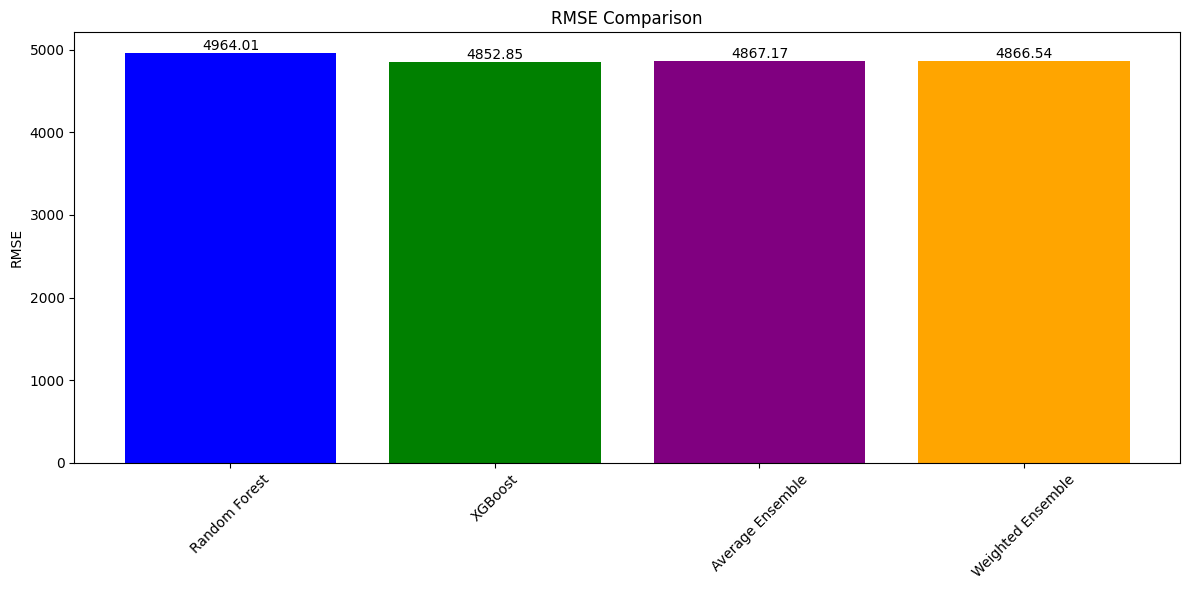

In [10]:
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'purple', 'orange']
bars = plt.bar(models, rmse_scores, color=colors)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

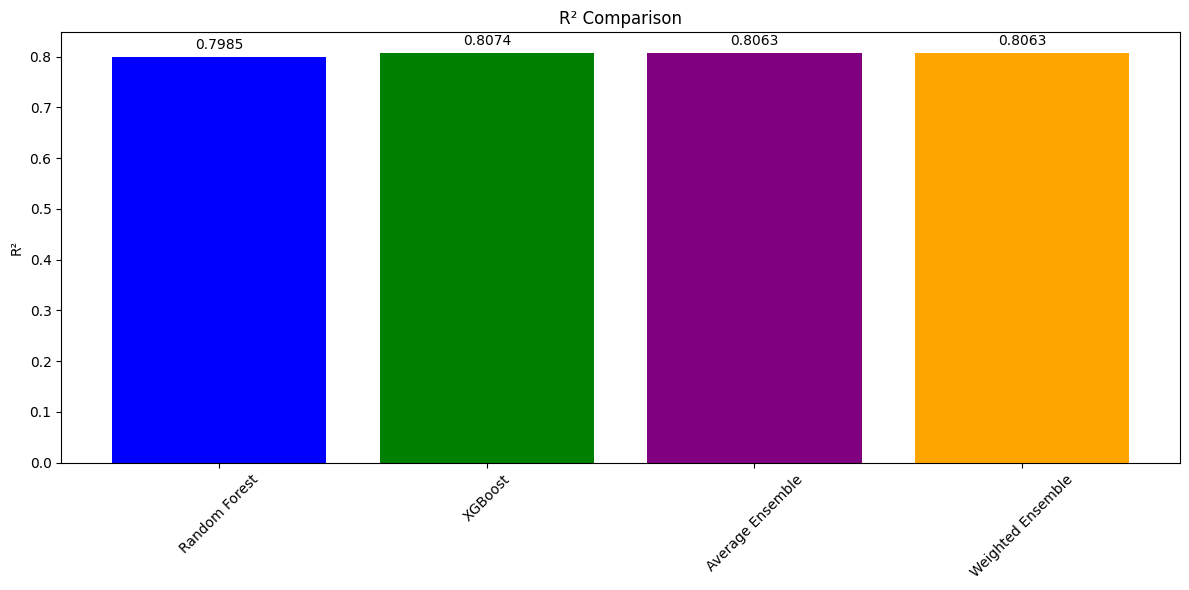

In [11]:
plt.figure(figsize=(12, 6))
bars = plt.bar(models, r2_scores, color=colors)
plt.title('R² Comparison')
plt.ylabel('R²')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()